# Sale Price Study Notebook


## Objectives

- **Address business requirement 1**:
    - **Correlation Analysis**: Investigate and quantify the relationships between various house features and the sale price.
    - **Visualization**: Illustrate these relationships through visual representations and provide a clear summary of how different features impact the sale price.

## Inputs

- The data loaded from the Data Collection Notebook: outputs/datasets/collection/house_prices_records.csv

## Outputs

- Correlation plots that address Business Requirement 1.

## Additional Comments

The analysis was conducted using the raw data prior to any cleaning processes. <br>
This ensures that the study is based on the original dataset preventing any inaccuracies that might arise from preprocessing data wich could lead to incorrect assumptions.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Heritage-Housing-Issue/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Heritage-Housing-Issue'

# Load Data

First, we will load the house prices dataset previously gathered and stored in the repository during the Data Collection phase. 

We will then display the first few rows of the dataset to confirm its structure and contents:

In [4]:
import pandas as pd

# Load the house prices dataset
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))

# Display the first five rows of the dataframe to inspect the data
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

Next, we will utilize Pandas Profiling to conduct a detailed exploration of the dataframe.

This enables us to review and analyze the dataset’s structure, highlighting key aspects such as missing values, variable distributions, and potential anomalies.

In [5]:
from ydata_profiling import ProfileReport

# Generate a report of the df DataFrame
pandas_report = ProfileReport(df=df, minimal=True)

# Display the report
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Dataset Overview**: Our review of the dataset provides the following:
- The dataset includes **24 columns** and **1460 rows**.
- Of these columns, **20 contain numerical data** while the remaining **4 are text variables** used as categorical identifiers.
- Importantly, the **"OverallCond"** and **"OverallQual"** variables use numerical values to scale the quality and condition of properties. <br> A similar approach may become helpful for the text-based categorical variables aswell.

Additionally, approximately 10% of the data is missing across various columns, a concern that will need to be addressed.

---

# Correlation Study

To understand the interactions among the dataset's features, we begin with an assessment of their relationships, focusing particularly on how they correlate with the Sale Price. 

Initially, we will employ both Pearson and Spearman correlation analyses to identify strong relationships within the data.

### Quick Explanation

**Pearson’s Correlation Coefficient**: Pearson’s correlation measures the linear relationship between two continuous variables. It quantifies the degree to which a pair of variables are related, providing a value between -1 and 1:
- 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other variable also increases.
- -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other variable decreases.
- 0 indicates no linear correlation, suggesting that there is no linear dependence between the variables.

**Spearman’s Correlation Coefficient**: Spearman’s correlation measures the monotonic relationship between two variables, whether linear or not. Spearman’s correlation is particularly useful when the data is not normally distributed and like pearson it also provide a value between -1 and 1:
- 1 indicates a perfect positive monotonic relationship, where increasing values in one variable consistently correspond with increasing values in the other.
- -1 indicates a perfect negative monotonic relationship, where increasing values in one variable consistently correspond with decreasing values in the other.
- 0 indicates no monotonic correlation, suggesting that there is no consistent relationship between the rankings of the variables.

### Limitations

Both methods require numerical data to compute correlations effectively. However, our dataset includes four variables that utilize text to categorize data.

To accurately apply these correlation methods, we need to convert these text variables into numerical categories.

### Handling Categorical Text Variables

We will first identify which variables are categorical using the following code:

In [6]:
# Selects columns of the type "object" and converts them to a list
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
categorical_vars

['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']

After identifying which variables are categorical with text data, we can further explore these variables to understand how they are structured and what unique categories they contain.

In [7]:
# Iterate over each categorical variable and prints the unique values
for var in categorical_vars:
    print(f"{var}: {df[var].unique()}")

BsmtExposure: ['No' 'Gd' 'Mn' 'Av' 'None']
BsmtFinType1: ['GLQ' 'ALQ' 'Unf' 'Rec' nan 'BLQ' 'None' 'LwQ']
GarageFinish: ['RFn' 'Unf' nan 'Fin' 'None']
KitchenQual: ['Gd' 'TA' 'Ex' 'Fa']


Now that we know the structure of the categorical variables, we will convert these text-based categories into numerical categories. 

In [8]:
# By using ordinal encoding we define dictionaries to map categorical descriptions to numerical values
bsmt_exposure_category = {'No': 0, 'Mn': 1, 'Av': 2, 'Gd': 3, 'None': -1}
bsmt_fin_type1_category = {'Unf': 0, 'LwQ': 1, 'Rec': 2, 'BLQ': 3, 'ALQ': 4, 'GLQ': 5, 'None': -1}
garage_finish_category = {'Unf': 0, 'RFn': 1, 'Fin': 2, 'None': -1}
kitchen_qual_category = {'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}

We will now apply the transformation into numerical categories directly to our DataFrame.

In [9]:
# Map to numerical values using the dictionaries defined earlier
df['BsmtExposure'] = df['BsmtExposure'].map(bsmt_exposure_category)
df['BsmtFinType1'] = df['BsmtFinType1'].map(bsmt_fin_type1_category)
df['GarageFinish'] = df['GarageFinish'].map(garage_finish_category)
df['KitchenQual'] = df['KitchenQual'].map(kitchen_qual_category)

## Pearson’s Correlation Coefficient

In [10]:
# Calculates the pearson correlation coefficients between "SalePrice" and the other variables
# Sort the values in descending order highlighting the strongest relationships
# Excludes the first result, wich is the correlation of SalePrice with itself wich is always 1
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GarageFinish    0.544382
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

## Spearman’s Correlation Coefficient

In [11]:
# Calculates the spearman correlation coefficients between "SalePrice" and the other variables
# Sort the values in descending order highlighting the strongest relationships
# Excludes the first result, wich is the correlation of SalePrice with itself wich is always 1
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageFinish    0.636076
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64

### Initial Insights

Based on the correlation analysis, where a coefficient above 0.70 indicates a strong correlation and values between 0.50 and 0.69 suggest moderate correlation, it is evident that several key variables significantly impact the sale price. Notably:

- **OverallQual**: 
    - Spearman: 0.809829
    - Pearson: 0.790982
    - **Analysis**: This variable shows the strongest correlation in both analyses. It is highly predictive of sale price, suggesting that improvements in quality can significantly impact the price.

- **GrLivArea** (Above ground living area square feet):
    - Spearman: 0.731310
    - Pearson: 0.708624
    - **Analysis**: This variable consistently shows a strong positive correlation, indicating that larger living areas tend to correspond to higher sale prices.

- **KitchenQual** (Kitchen Quality):
    - Spearman: 0.672849
    - Pearson: 0.659600
    - **Analysis**:  Kitchen quality significantly influences the sale price, with strong correlations evident in both Spearman and Pearson metrics.

- **GarageArea**:
    - Spearman: 0.649379
    - Pearson: 0.623431
    - **Analysis**: The area of the garage in square feet also demonstrates a strong correlation with sale prices.

- **TotalBsmtSF** (Total square feet of basement area):
    - Spearman: 0.602725
    - Pearson: 0.613581
    - **Analysis**: Another strong correlate, indicating that the size of the basement is a key factor in home prices.

- **YearBuilt**: 
    - Spearman: 0.652682
    - Pearson: 0.522897
    - **Analysis**: Generally, newer homes tend to have higher sale prices, though the relationship is stronger in the Spearman correlation, suggesting that the relationship might not be strictly linear but is consistently positive.

### Supporting Analysis:

- **YearRemodAdd** (Year of Remodel/Addition):
    - Both correlations show that more recently remodeled or added constructions increase the home’s value. <br> This is simply speculation but since Overall Quality of the house plays the highest role on the sale price, it might be due to remodeling, higher quality materials are used and thus increasing the value.

- **1stFlrSF** (First Floor square feet):
    - Consistent strong correlation in both analyses.

---

# In-Depth Correlation Analysis

We will now conduct a detailed examination of the relationships among the variables identified as having significant influence on the sale price.

This extended analysis involves generating visual representations through heatmaps to better understand both the linear and nonlinear relationships present in the data.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps

def heatmap_corr(df,threshold, figsize=(20,12), font_annot = 8):
  if len(df.columns) > 1:
    mask = np.zeros_like(df, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    mask[abs(df) < threshold] = True

    fig, axes = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                linewidth=0.5
                     )
    axes.set_yticklabels(df.columns, rotation = 0)
    plt.ylim(len(df.columns),0)
    plt.show()


def heatmap_pps(df,threshold, figsize=(20,12), font_annot = 8):
    if len(df.columns) > 1:

      mask = np.zeros_like(df, dtype=np.bool)
      mask[abs(df) < threshold] = True

      fig, ax = plt.subplots(figsize=figsize)
      ax = sns.heatmap(df, annot=True, xticklabels=True,yticklabels=True,
                       mask=mask,cmap='rocket_r', annot_kws={"size": font_annot},
                       linewidth=0.05,linecolor='grey')
      
      plt.ylim(len(df.columns),0)
      plt.show()



def CalculateCorrAndPPS(df):
  df_corr_spearman = df.corr(method="spearman")
  df_corr_pearson = df.corr(method="pearson")

  pps_matrix_raw = pps.matrix(df)
  pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

  pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
  print("PPS threshold - check PPS score IQR to decide the threshold for the heatmap \n")
  print(pps_score_stats.round(3))

  return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix,CorrThreshold,PPS_Threshold,
                      figsize=(20,12), font_annot=8 ):

  print("\n")
  print("* Analyze how the target variable for your ML models are correlated with other variables (features and target)")
  print("* Analyze multi colinearity, that is, how the features are correlated among themselves")

  print("\n")
  print("*** Heatmap: Spearman Correlation ***")
  print("It evaluates monotonic relationship \n")
  heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Pearson Correlation ***")
  print("It evaluates the linear relationship between two continuous variables \n")
  heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

  print("\n")
  print("*** Heatmap: Predictive power Score (PPS) ***")
  print(f"PPS detects linear or non-linear relationships between two columns.\n"
        f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
  heatmap_pps(df=pps_matrix,threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [13]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

PPS threshold - check PPS score IQR to decide the threshold for the heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.045  0.097  0.0  0.0  0.0  0.038  0.702




* Analyze how the target variable for your ML models are correlated with other variables (features and target)
* Analyze multi colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



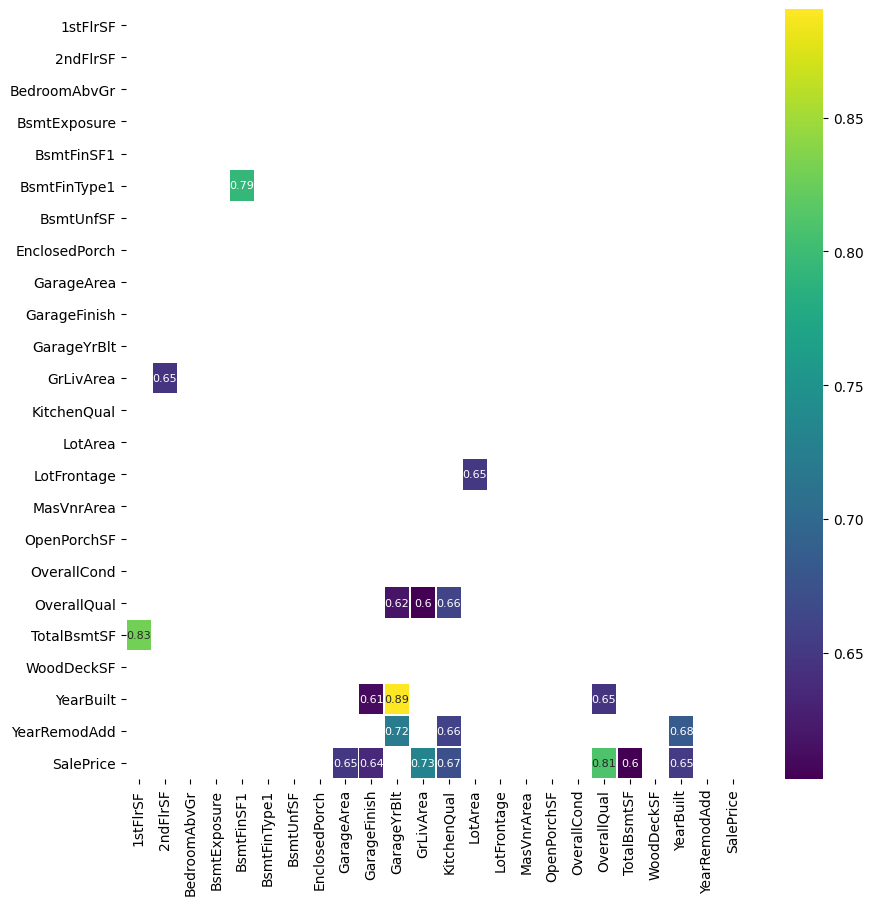



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



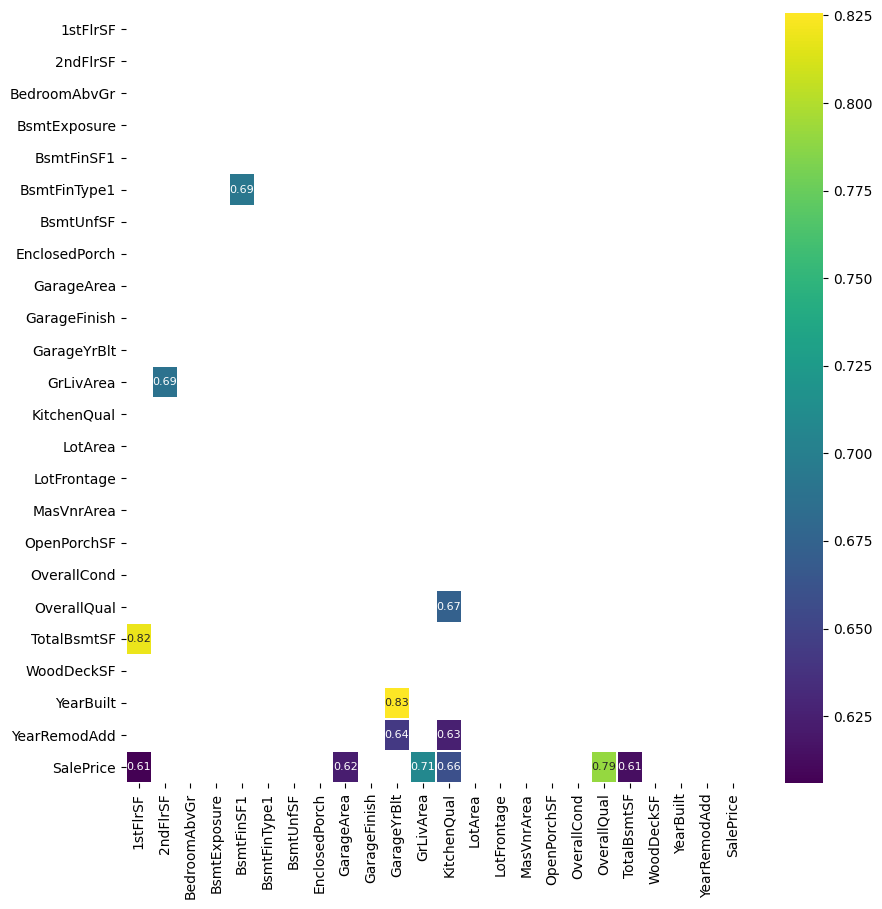



*** Heatmap: Predictive power Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



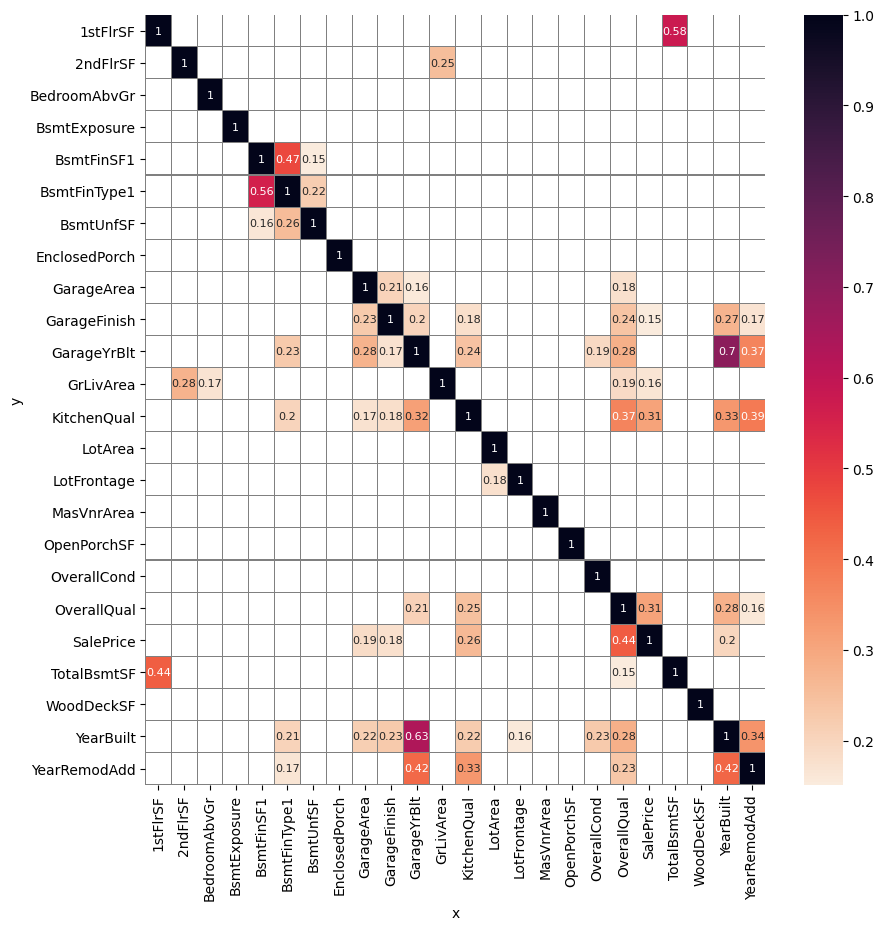

In [14]:
DisplayCorrAndPPS(df_corr_pearson=df_corr_pearson,
                  df_corr_spearman=df_corr_spearman, 
                  pps_matrix=pps_matrix,
                  CorrThreshold=0.6, PPS_Threshold=0.15,
                  figsize=(10,10), font_annot=8)

## Heatmap Analysis

The heatmaps generated using both Pearson and Spearman correlation coefficients offer a clearer view of the relationships between various house features and the sale price.

Some noteworthy observations:

- **Kitchen Quality**:
It indeed shows a strong correlation with Sale Price, but it also correlates strongly with Overall Quality. <br> This suggests that as the overall quality of the house increases, there tends to be a corresponding increase in the quality of the kitchen. This might be useful, as we might decide to use only one of these features for our model to avoid redundancy.
Given the overwhelming predictive power of overall quality, we may have to prioritize it over kitchen quality in predictive modeling.

- **YearRemodAdd** and **YearBuilt**:
While both of these features also show substantial correlation with Sale Price, their Power Predictive Scores (PPS) are different. **YearBuilt** has a higher PPS, suggesting that while renovations are valued, they might not be as critically influential as the original construction date on the Sale Price. <br> Additionally, **YearRemodAdd** and **YearBuilt** demonstrate a strong correlation and PPS with each other, wich merits further investigation.

### Variable Selection for Further Analysis:

Based on the insights from both Pearson and Spearman correlations and the detailed heatmap analysis, we identify a set of variables that significantly influence Sale Price. These include:

- **Overall Quality** (OverallQual)
- **Ground Living Area** (GrLivArea)
- **Garage Area** (GarageArea)
- **Total Basement Area** (TotalBsmtSF)
- **Year Built** (YearBuilt)
- **First Floor Area** (1stFlrSF)
- **Year of Last Remodel/Addition** (YearRemodAdd)

To further solidify our understanding on how these variables impact Sale price, we will conduct another visual analysis.

We will create plots for each of these variables against Sale Price to visually asses their relationships.

---

# Bivariate Plots Analysis

## Understanding Bivariate Analysis

**Bivariate analysis** examines the relationship between two variables to understand their interaction and influence on each other.

 The plot line visually summarizes this relationship. It indicates the trend direction (upward for positive, downward for negative) and strength (steepness of the line), helping to quickly assess how closely the variables are related.

## Target vs Features

The following plots visualize the relationships between each selected variable and the Sale Price, illustrating positive trends that confirm our earlier heatmap analysis.

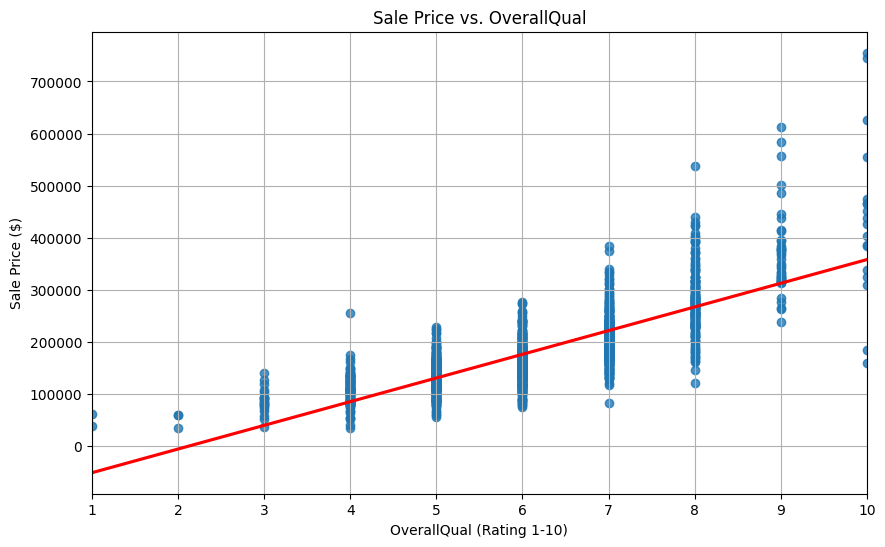

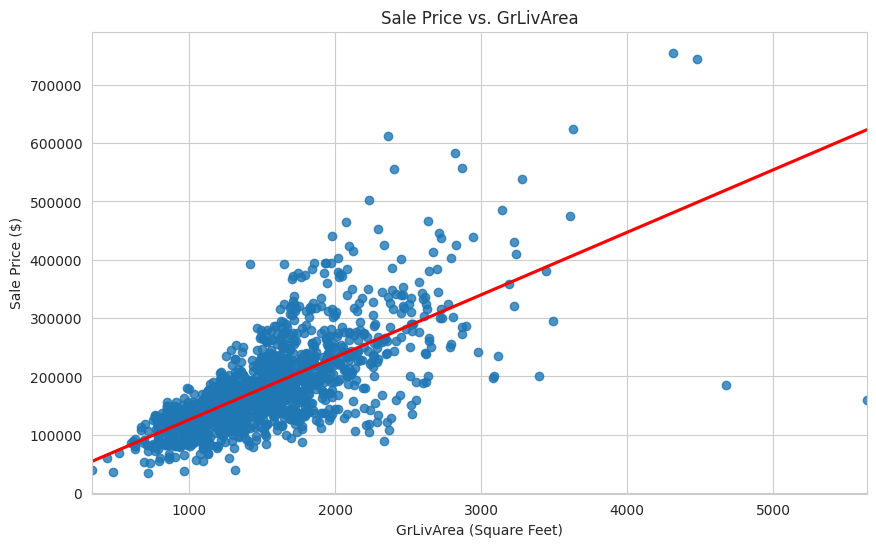

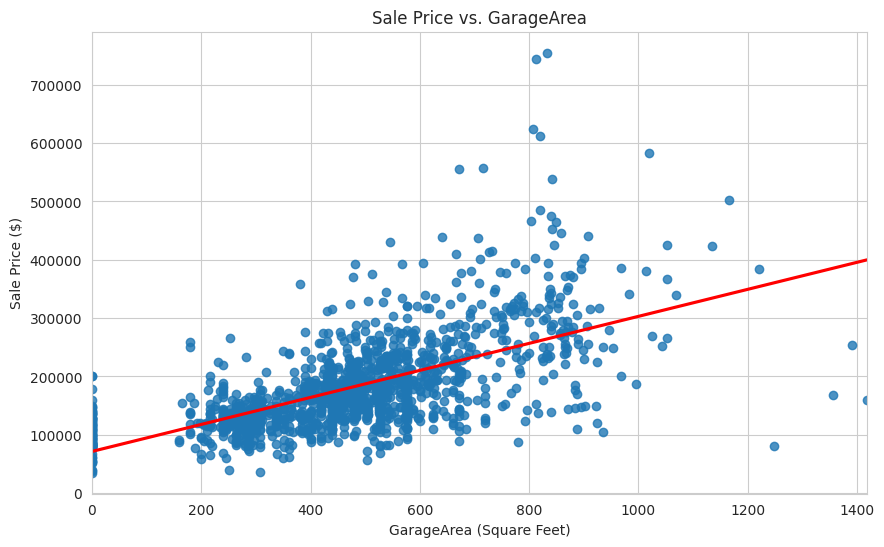

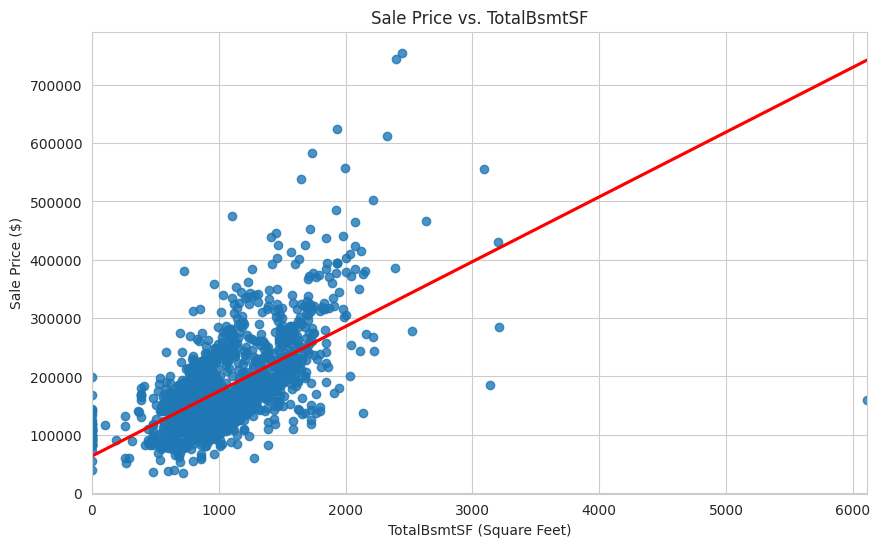

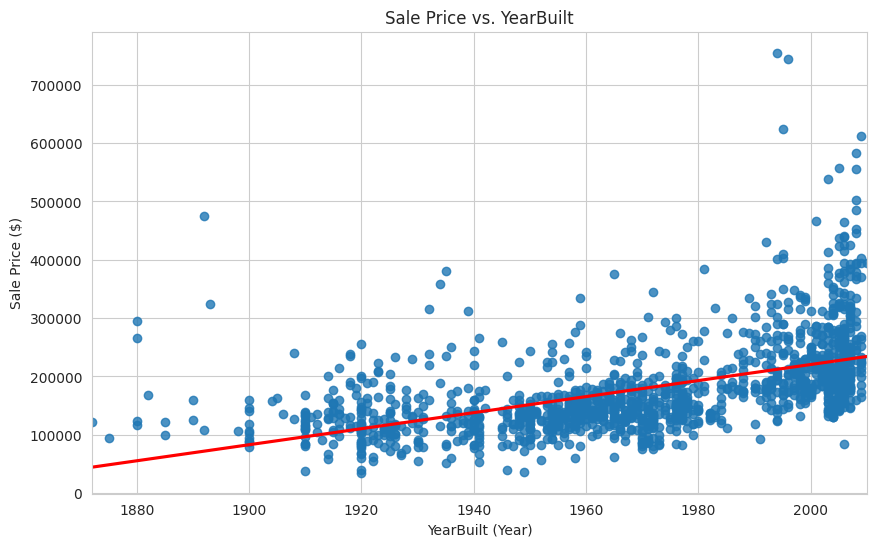

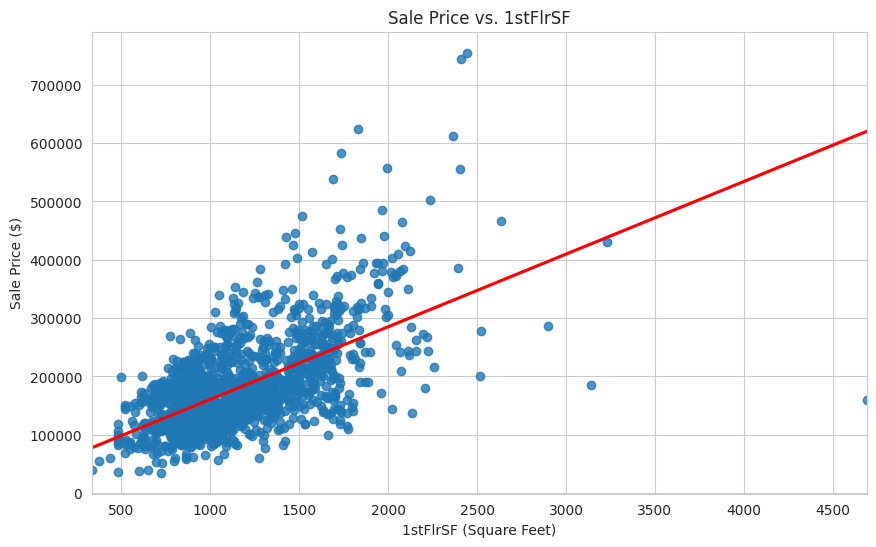

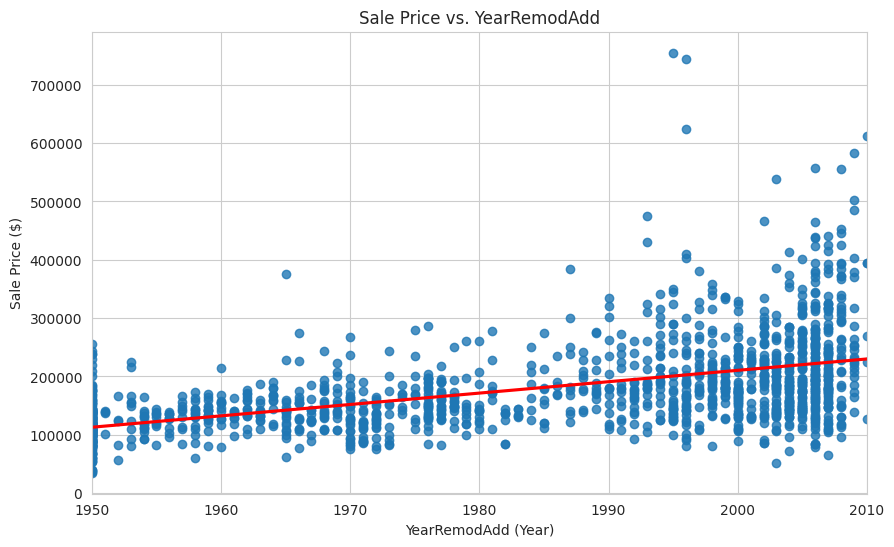

In [15]:
variables = {
    'OverallQual': 'Rating 1-10',
    'GrLivArea': 'Square Feet',
    'GarageArea': 'Square Feet',
    'TotalBsmtSF': 'Square Feet',
    'YearBuilt': 'Year',
    '1stFlrSF': 'Square Feet',
    'YearRemodAdd': 'Year',
}

# Loop through each variable and its unit in the dictionary and create a regression plot
for variable, unit in variables.items():
    plt.figure(figsize=(10, 6))
    sns.regplot(x=variable, y='SalePrice', data=df, line_kws={"color": "red"}, ci=None)
    sns.set_style("whitegrid")
    plt.title(f'Sale Price vs. {variable}')
    plt.xlabel(f'{variable} ({unit})')
    plt.ylabel('Sale Price ($)')
    plt.grid(True)
    plt.show()

Here's a summary of what we observed:

- Overall Quality (OverallQual):
    Shows yet again a clear, strong positive trend where higher quality ratings consistently correspond to higher sale prices.

- Ground Living Area (GrLivArea):
    Larger living areas are directly correlated with higher sale prices.

- Garage Area (GarageArea):
    Similar to living area, a larger garage space also attracts higher prices.

- Total Basement Area (TotalBsmtSF):
    The size of the basement is another crucial factor.

- First Floor Area (1stFlrSF):
    This also indicates that properties with larger first-floor areas fetch higher prices, which aligns with the general preference for more living space.

- Year Built (YearBuilt):
    Newer properties tend to sell for more.

- Year of Remodel/Addition (YearRemodAdd):
    Although the impact is less pronounced than the original year built, remodeled or recently updated properties still command higher prices.

## Feature Interactions:

Next, we delve deeper into understanding how the features not only relate to the sale price but also interact with each other.

### Overall Quality vs Kitchen Quality

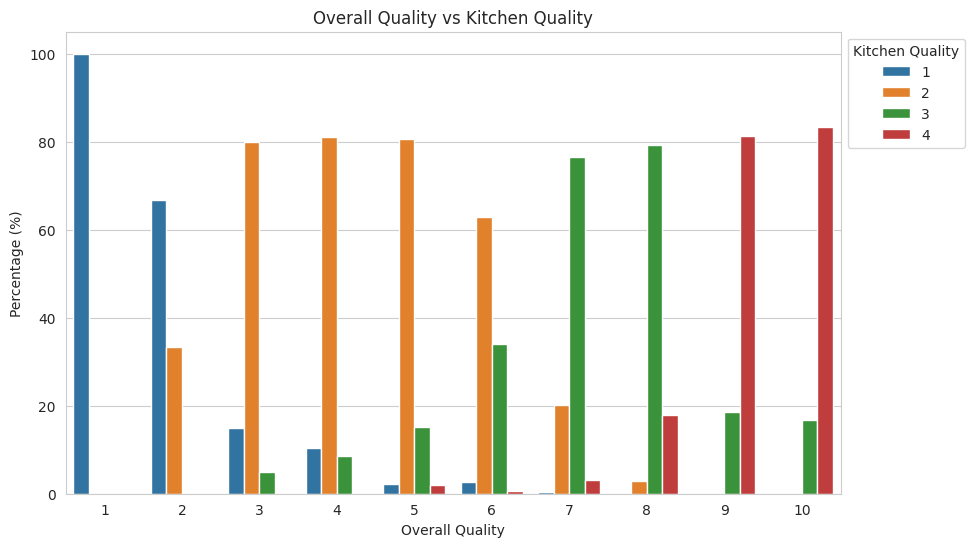

In [16]:
# Calculate the total counts for each 'OverallQual' to find percentages
count_df = df.groupby(['OverallQual', 'KitchenQual']).size().reset_index(name='counts')

total_counts = count_df.groupby('OverallQual')['counts'].transform('sum')
count_df['percentage'] = (count_df['counts'] / total_counts) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='OverallQual', y='percentage', hue='KitchenQual', data=count_df)
plt.title('Overall Quality vs Kitchen Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Percentage (%)')
plt.legend(title='Kitchen Quality', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

It's noticeable that higher overall quality tends to be associated with better kitchen quality, with quality ratings 3 and 4 more prevalent as the overall quality increases.

### Overall Quality vs Year Built

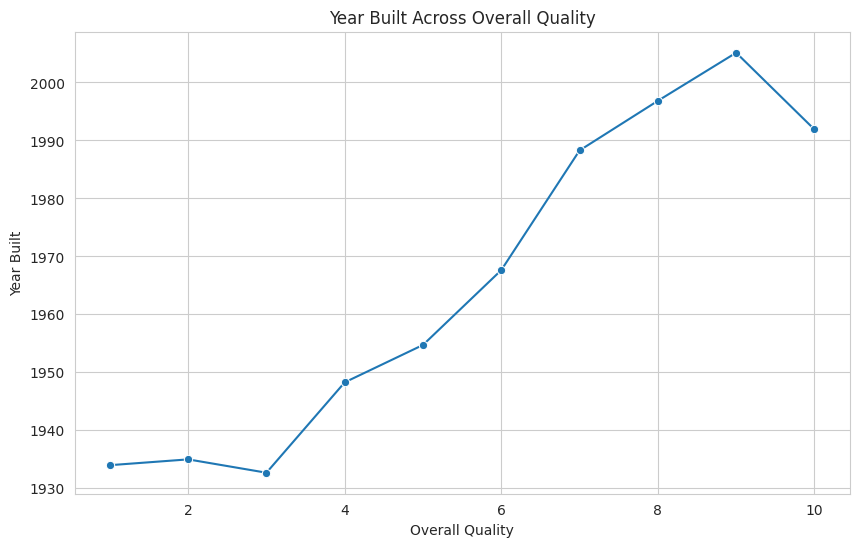

In [17]:
agg_data = df.groupby('OverallQual')['YearBuilt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='OverallQual', y='YearBuilt', data=agg_data, marker='o')
plt.title('Year Built Across Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Year Built')
plt.grid(True)
plt.show()

This plot illustrates a trend where newer houses tend to have higher overall quality ratings. This could indicate that construction standards have improved over time, or that newer homes are built with better materials and more modern features, both of which contribute to higher overall quality.

### Overall Quality vs Year Remodeled

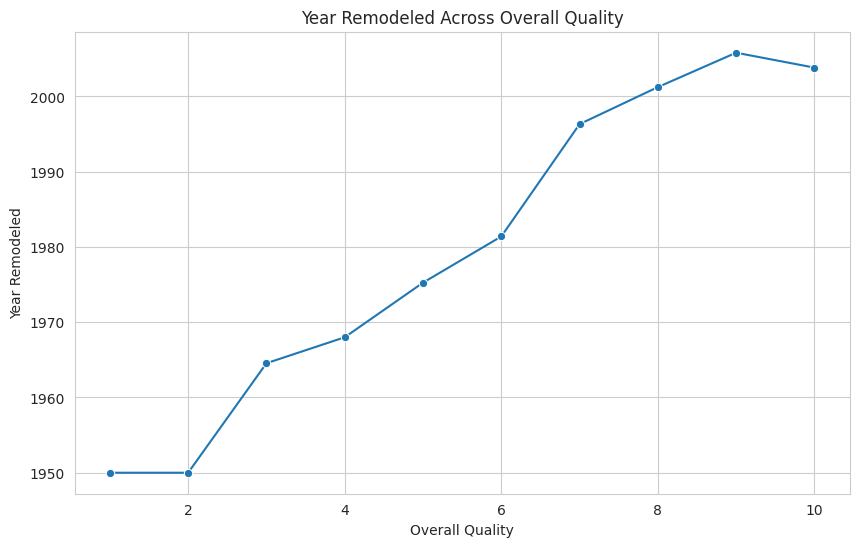

In [18]:
agg_data = df.groupby('OverallQual')['YearRemodAdd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='OverallQual', y='YearRemodAdd', data=agg_data, marker='o')
plt.title('Year Remodeled Across Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Year Remodeled')
plt.grid(True)
plt.show()

This plot, just like with the Year Built vs Overall Quality plot indicates that more recently remodeled houses have higher overall qualities.

Given the strong correaltion between the year a house is built and remodeled, let's examine the relationship between them.

### Year Built vs Year Remodeled

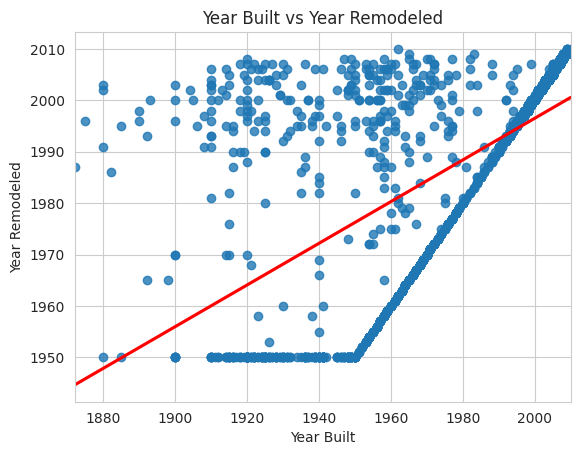

In [19]:
sns.regplot(y='YearRemodAdd', x='YearBuilt', data=df, ci=None, line_kws={"color": "red"})
plt.title('Year Built vs Year Remodeled')
plt.xlabel('Year Built')
plt.ylabel('Year Remodeled')
plt.show()

The clustering along the diagonal indicates that the data entry defaulted to using the construction year when no renovations were made.

Additionally, the plot shows a general increase in remodels over time, particularly for homes built before the 1980.
This suggests that older homes are more likely to have undergone renovations.

We may need to differentiate between genuine remodels and cases where the remodel year simply echoes the construction year.

Let's determine how many houses in our dataset have the same year listed for both construction and remodeling.

In [20]:
# Calculate the number of houses where the year is the same as the year remodeled
same_year_count = (df['YearBuilt'] == df['YearRemodAdd']).sum()

# Get the total numer of houses in the DataFrame
total_properties = len(df)

# Calculates the amount of houses where the year built is different from the year remodeled
different_year = total_properties - same_year_count

print(f"Number of properties where the build year and remodel year are the same: {same_year_count}")
print(f"Total number of properties: {total_properties}")

Number of properties where the build year and remodel year are the same: 764
Total number of properties: 1460


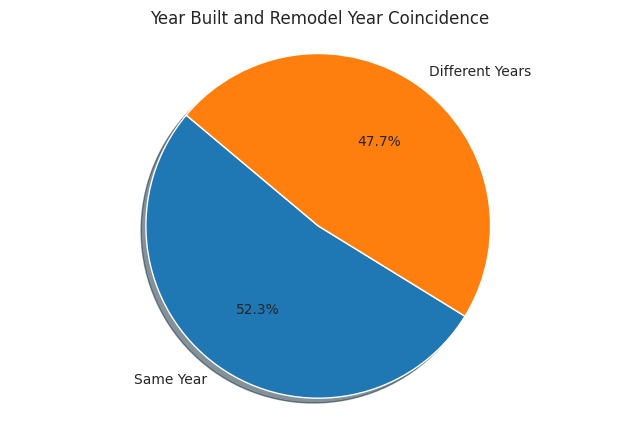

In [21]:
labels = 'Same Year', 'Different Years'
sizes = [same_year_count, different_year]

plt.figure(figsize=(8, 5))
# Plot a pie with the defined sizes ad labels, formats the percentages to 1 decimal place
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Year Built and Remodel Year Coincidence')
plt.show()

This pie chart reveals a significant insight into the dataset: over half (52.3%) of the properties have the same year listed for both construction and remodeling. This could suggest that a significant number of entries did not undergo any actual remodeling but were simply documented as such.

Adjusting the "remodel year" value to Null in cases where it matches the construction year might significantly affect how the remodel year correlates with the sale price.

---

# Conclusions and Next Steps

## Conclusions

In response to Business Requirement 1, our correlation and Power Predictive Score (PPS) analysis has provided insights into the relationship between various house attributes and the sale price. <br> 
Here are the main findings:

- Overall Quality has shown the most robust correlation with Sale Price, suggesting it as the most critical predictor. Houses with higher overall quality are consistently priced higher.

- There is a strong positive correlation between living area and Sale Price, which means that larger homes tend to have higher value.
- Both garage and basement sizes are significant predictors of Sale Price, indicating that usable space has once more a big influence on the sale price.

- Newer homes typically have a higher sale price. The data revealed a significant overlap in the years built and remodeled, suggesting that properties are often listed as remodeled at the time of construction. This might have an impact on the correlation between Year remodeled and the sale price. Adjusting these values where they coincide could provide a clearer picture of true remodel value.

- Although kitchen quality strongly correlates with Sale Price, it also closely mirrors overall quality. This suggests that in predictive modeling, focusing on overall quality might suffice.

## Next Steps

- **Data Cleaning**: Address missing values and anomalies in the data to prepare for more accurate modeling.

- **Feature Engineering**: Consider reducing redundancy by potentially omitting closely correlated features like kitchen quality when overall quality is included.

- **Model Development**: Begin developing predictive models using this study to forecast Sale Prices accurately.